## 2. La mochila 0-1

Dado un conjunto finito de ítems, cada uno de los cuales tiene asociado un peso y una ganancia, seleccionar el subconjunto de ítems a incluir en una mochila (capaz de soportar un peso máximo finito) cuya inclusión proporcione una ganancia máxima. 

In [21]:
def mochila_01(valores, pesos, capacidad):
    n = len(valores)
    matriz = [[0] * (capacidad + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, capacidad + 1):
            if pesos[i - 1] <= j:
                matriz[i][j] = max(matriz[i - 1][j], matriz[i - 1][j - pesos[i - 1]] + valores[i - 1])
            else:
                matriz[i][j] = matriz[i - 1][j]

    seleccionados = []
    i, j = n, capacidad
    while i > 0 and j > 0:
        if matriz[i][j] != matriz[i - 1][j]:
            seleccionados.append(i - 1)
            j -= pesos[i - 1]
        i -= 1

    seleccionados.reverse()

    return matriz[n][capacidad], seleccionados

# Ejemplo de uso
valores = [60, 100, 120, 90, 80]
pesos = [10, 20, 30, 15, 12]
capacidad_mochila = 50

ganancia, seleccionados = mochila_01(valores, pesos, capacidad_mochila)

print("Ganancia máxima:", ganancia)
print("Ítems seleccionados:", seleccionados)

Ganancia máxima: 270
Ítems seleccionados: [1, 3, 4]


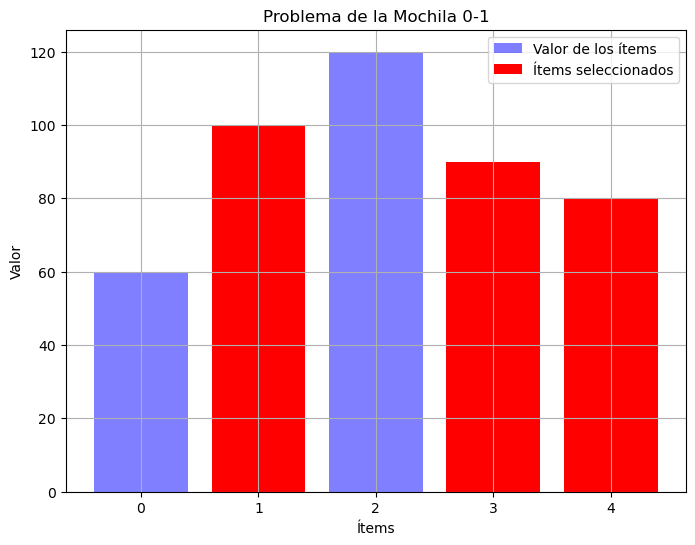

In [22]:
# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar(range(len(valores)), valores, color='blue', alpha=0.5)
plt.xticks(range(len(valores)))
plt.xlabel('Ítems')
plt.ylabel('Valor')
plt.title('Problema de la Mochila 0-1')
plt.grid(True)

# Marcar los ítems seleccionados
for item in seleccionados:
    plt.bar(item, valores[item], color='red')

plt.legend(['Valor de los ítems', 'Ítems seleccionados'])
plt.show()